# 参数设置

In [51]:
# 数据集文件夹名
wine.dataset.folder <- "datasets"

# 图像文件夹名
figure.folder <- "figures"

# 模型结果文件夹名
model.summary.folder <- "model-summary"

# 数据集名称
red.wine.filename <- "winequality-red.csv"

# 分割线
seperation.line <- "-------------------------------------------------------------------------\n"

# 加载 packages
library(ggplot2)
library(xtable)
library(lmtest)
library(car)
library(MASS)

# 描述性统计

In [52]:
# 读取红酒数据
red.wine.path <- file.path(wine.dataset.folder, red.wine.filename)
red.wine <- read.csv(red.wine.path, sep = ",")
str(red.wine)

'data.frame':	559 obs. of  12 variables:
 $ fixed.acidity       : num  8.67 7.98 9.16 7.81 10.48 ...
 $ volatile.acidity    : num  0.764 0.842 0.841 0.453 0.312 ...
 $ citric.acid         : num  0.495 0.162 0.228 0.334 0.619 ...
 $ residual.sugar      : num  1.48 2.2 2.29 1.5 1.88 ...
 $ chlorides           : num  0.6876 0.1309 0.1014 -0.0147 0.1565 ...
 $ free.sulfur.dioxide : num  11.88 9.01 9.98 8.9 5.92 ...
 $ total.sulfur.dioxide: num  66 22.9 103 29.2 24 ...
 $ density             : num  0.947 1.091 1.037 0.885 1.074 ...
 $ pH                  : num  2.91 3.26 2.95 3.32 3.08 ...
 $ sulphates           : num  0.4035 0.7008 0.855 1.2378 0.0798 ...
 $ alcohol             : num  9.15 10.34 10.23 9.14 10.95 ...
 $ quality             : int  5 5 6 5 7 7 5 4 6 7 ...


In [53]:
print(xtable(summary(red.wine[, 1:4])))
print(xtable(summary(red.wine[, 5:8])))
print(xtable(summary(red.wine[, 9:12])))

% latex table generated in R 4.1.2 by xtable 1.8-4 package
% Fri Jan  5 02:17:34 2024
\begin{table}[ht]
\centering
\begin{tabular}{rllll}
  \hline
 & fixed.acidity & volatile.acidity &  citric.acid & residual.sugar \\ 
  \hline
X & Min.   : 6.557   & Min.   :0.0052   & Min.   :-0.1331   & Min.   :1.223   \\ 
  X.1 & 1st Qu.: 7.857   & 1st Qu.:0.3278   & 1st Qu.: 0.3126   & 1st Qu.:1.784   \\ 
  X.2 & Median : 8.622   & Median :0.4581   & Median : 0.4563   & Median :1.977   \\ 
  X.3 & Mean   : 8.859   & Mean   :0.4808   & Mean   : 0.4535   & Mean   :2.407   \\ 
  X.4 & 3rd Qu.: 9.309   & 3rd Qu.:0.6300   & 3rd Qu.: 0.5803   & 3rd Qu.:2.457   \\ 
  X.5 & Max.   :12.642   & Max.   :1.0396   & Max.   : 1.1742   & Max.   :6.780   \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 4.1.2 by xtable 1.8-4 package
% Fri Jan  5 02:17:34 2024
\begin{table}[ht]
\centering
\begin{tabular}{rllll}
  \hline
 &   chlorides & free.sulfur.dioxide & total.sulfur.dioxide &    density \\ 


## 因变量描述

In [54]:
# 获取频率直方图
frequency_table <- table(red.wine$quality)
red.wine.quality.frequency.figure.path <- file.path(figure.folder, "quality-frequency.png")

# 保存图像
png(filename = red.wine.quality.frequency.figure.path) 
barplot(frequency_table, main = "Frequency of quality", xlab = "Quality", ylab = "Frequency")
dev.off()

png 
  2

## 自变量描述

In [55]:
distribution.and.boxplot <- function(col){
    figure.path <- file.path(figure.folder, paste0(col, "-plot.png"))
    frequency_table <- table(red.wine[[col]])
    png(filename = figure.path, width = 800)
    par(mfrow = c(1, 1))
    barplot(frequency_table, main = paste0("Frequency of ", col), xlab = col, ylab = "Frequency")
    boxplot(red.wine[[col]] ~ red.wine$quality,
    
            main = paste0("Box plot of ", col, " by quality"),
            ylab = col, xlab = "Quality")
    dev.off()
}

# 绘制所有特征的分布图和箱线图
for(col in names(red.wine)){
    if(col != "quality"){
        distribution.and.boxplot(col)
    }
}

# 模型拟合

In [56]:
save_red_wine_model_summary <- function(model, file_name) {
  # 创建完整文件路径
  file_path <- file.path(model.summary.folder, paste0(file_name, ".txt"))

  # 将summary输出捕获到字符向量
  summary_text <- capture.output(xtable(summary(model)))

  # 将summary输出写入txt文件
  writeLines(summary_text, file_path)

  cat("Model summary saved to:", file_path, "\n")
}

### 线性回归全模型

In [57]:
linear.model <- lm(quality ~ ., data = red.wine)
#print(xtable(summary(linear.model)))
save_red_wine_model_summary(linear.model, "linear-model")
par(mfrow = c(2, 2))
linear.model.plot.path <- file.path(model.summary.folder, "linear-model-plot.png")
png(linear.model.plot.path)
par(mfrow = c(2, 2))
plot(linear.model)
dev.off()
summary(linear.model)

Model summary saved to: model-summary/linear-model.txt 


png 
  2


Call:
lm(formula = quality ~ ., data = red.wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.39496 -0.37997 -0.03304  0.31153  2.22009 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.557696   0.865071   1.801 0.072308 .  
fixed.acidity         0.077067   0.021958   3.510 0.000485 ***
volatile.acidity     -1.044835   0.147715  -7.073 4.65e-12 ***
citric.acid           0.088578   0.153774   0.576 0.564832    
residual.sugar        0.010021   0.027679   0.362 0.717450    
chlorides            -0.216679   0.189084  -1.146 0.252320    
free.sulfur.dioxide  -0.018150   0.004423  -4.103 4.69e-05 ***
total.sulfur.dioxide -0.000776   0.001193  -0.650 0.515737    
density               0.146181   0.243681   0.600 0.548830    
pH                   -0.234897   0.207184  -1.134 0.257391    
sulphates            -0.062618   0.055024  -1.138 0.255614    
alcohol               0.485637   0.037607  12.913  < 2e-16 ***
---
Signif. 

#### 模型检验

In [58]:
cooksd <- cooks.distance(linear.model)
cook.plot.path <- file.path(figure.folder, "cook.png")
png(cook.plot.path)
plot(cooksd, main = "Cook's Distance",
     ylab = "Cook's Distance", xlab = "Observation")
abline(h = 4/length(cooksd), col = "red", lty=2)
dev.off()

png 
  2

In [59]:
ncvTest(linear.model) # 异方差
dwtest(linear.model) # 自相关性


Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.1033325, Df = 1, p = 0.74787


	Durbin-Watson test

data:  linear.model
DW = 2.0775, p-value = 0.8176
alternative hypothesis: true autocorrelation is greater than 0


In [60]:
print(xtable(as.data.frame(vif(linear.model)))) # 多重共线性

% latex table generated in R 4.1.2 by xtable 1.8-4 package
% Fri Jan  5 02:17:35 2024
\begin{table}[ht]
\centering
\begin{tabular}{rr}
  \hline
 & vif(linear.model) \\ 
  \hline
fixed.acidity & 1.50 \\ 
  volatile.acidity & 1.45 \\ 
  citric.acid & 1.62 \\ 
  residual.sugar & 1.75 \\ 
  chlorides & 2.08 \\ 
  free.sulfur.dioxide & 2.94 \\ 
  total.sulfur.dioxide & 4.12 \\ 
  density & 1.04 \\ 
  pH & 2.08 \\ 
  sulphates & 1.49 \\ 
  alcohol & 1.62 \\ 
   \hline
\end{tabular}
\end{table}


## 选模型

In [61]:
linear.model.AIC <- step(linear.model,
                         direction = "both",
                         trace = 0, criterion = "AIC")
print(xtable(summary(linear.model.AIC)))
summary(linear.model.AIC)

% latex table generated in R 4.1.2 by xtable 1.8-4 package
% Fri Jan  5 02:17:35 2024
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & Estimate & Std. Error & t value & Pr($>$$|$t$|$) \\ 
  \hline
(Intercept) & 0.6495 & 0.3696 & 1.76 & 0.0794 \\ 
  fixed.acidity & 0.0952 & 0.0190 & 5.01 & 0.0000 \\ 
  volatile.acidity & -1.0721 & 0.1330 & -8.06 & 0.0000 \\ 
  free.sulfur.dioxide & -0.0201 & 0.0026 & -7.66 & 0.0000 \\ 
  alcohol & 0.4991 & 0.0329 & 15.16 & 0.0000 \\ 
   \hline
\end{tabular}
\end{table}



Call:
lm(formula = quality ~ fixed.acidity + volatile.acidity + free.sulfur.dioxide + 
    alcohol, data = red.wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.32752 -0.39307 -0.02087  0.30917  2.27175 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.649478   0.369617   1.757   0.0794 .  
fixed.acidity        0.095214   0.019018   5.006 7.46e-07 ***
volatile.acidity    -1.072106   0.133041  -8.058 4.78e-15 ***
free.sulfur.dioxide -0.020101   0.002625  -7.658 8.48e-14 ***
alcohol              0.499109   0.032922  15.160  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5743 on 554 degrees of freedom
Multiple R-squared:  0.563,	Adjusted R-squared:  0.5598 
F-statistic: 178.4 on 4 and 554 DF,  p-value: < 2.2e-16


In [62]:
linear.model.BIC <- step(linear.model,
                         direction = "both",
                         trace = 0, criterion = "BIC")
print(xtable(summary(linear.model.BIC)))
summary(linear.model.BIC)

% latex table generated in R 4.1.2 by xtable 1.8-4 package
% Fri Jan  5 02:17:35 2024
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & Estimate & Std. Error & t value & Pr($>$$|$t$|$) \\ 
  \hline
(Intercept) & 0.6495 & 0.3696 & 1.76 & 0.0794 \\ 
  fixed.acidity & 0.0952 & 0.0190 & 5.01 & 0.0000 \\ 
  volatile.acidity & -1.0721 & 0.1330 & -8.06 & 0.0000 \\ 
  free.sulfur.dioxide & -0.0201 & 0.0026 & -7.66 & 0.0000 \\ 
  alcohol & 0.4991 & 0.0329 & 15.16 & 0.0000 \\ 
   \hline
\end{tabular}
\end{table}



Call:
lm(formula = quality ~ fixed.acidity + volatile.acidity + free.sulfur.dioxide + 
    alcohol, data = red.wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.32752 -0.39307 -0.02087  0.30917  2.27175 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.649478   0.369617   1.757   0.0794 .  
fixed.acidity        0.095214   0.019018   5.006 7.46e-07 ***
volatile.acidity    -1.072106   0.133041  -8.058 4.78e-15 ***
free.sulfur.dioxide -0.020101   0.002625  -7.658 8.48e-14 ***
alcohol              0.499109   0.032922  15.160  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5743 on 554 degrees of freedom
Multiple R-squared:  0.563,	Adjusted R-squared:  0.5598 
F-statistic: 178.4 on 4 and 554 DF,  p-value: < 2.2e-16


## Box-cox变换

In [63]:
boxcox.path <- file.path(figure.folder, "boxcox.png")
png(boxcox.path)
lambdas <- boxcox(red.wine$quality ~ 1, plotit = TRUE)
dev.off()
best.lambda <- lambdas$x[which.max(lambdas$y)]
print(best.lambda)

png 
  2

[1] -0.7474747


## 主成份分析

In [69]:
linear.model.PCA <- prcomp(red.wine, scale = TRUE)
summary(linear.model.PCA)

ERROR: Error in as.dataframe(summary(linear.model.PCA)): could not find function "as.dataframe"


## 人工构造特征

Warning message in log(red.wine$sulphates):
“NaNs produced”


Model summary saved to: model-summary/augmented-linear-model.txt 


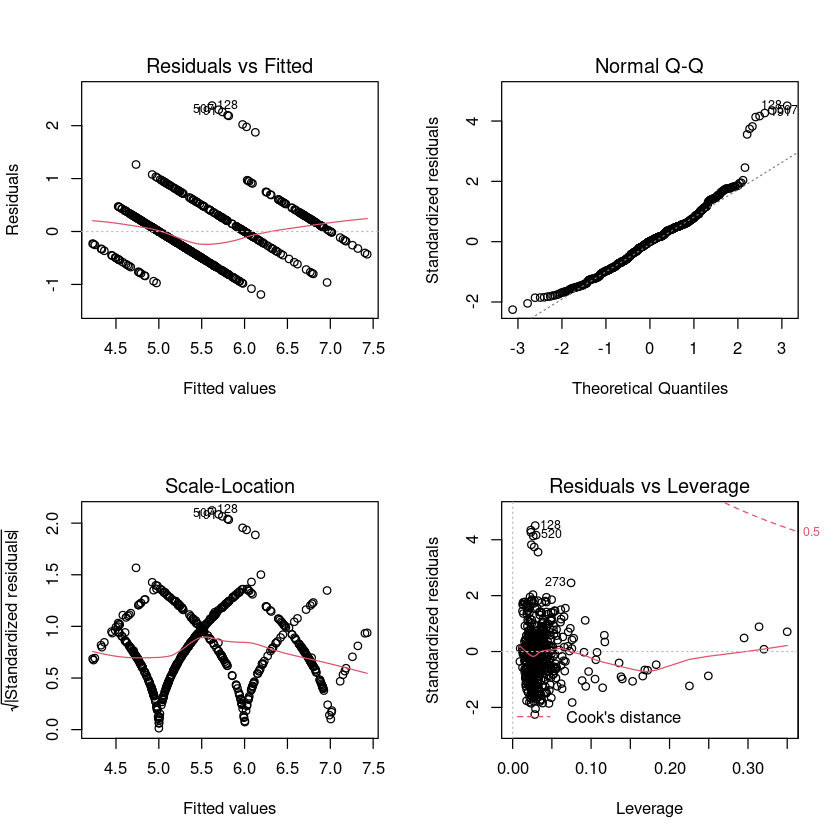

In [ ]:
red.wine$sulphates.square <- (red.wine$sulphates)^2
red.wine$sulphates.cube <- (red.wine$sulphates)^3
red.wine$sulphates.ln <- log(red.wine$sulphates)
#red.wine$sulphates.inv.ln <- 1 / log(red.wine$sulphates)
red.wine$alcohol.square <- (red.wine$alcohol)^2
red.wine$alcohol.cube <- (red.wine$alcohol)^3
red.wine$alcohol.ln <- log(red.wine$alcohol)
#red.wine$alcohol.inv.ln <- 1 / log(red.wine$alcohol)
red.wine$pH.square <- (red.wine$pH)^2
red.wine$pH.cube <- (red.wine$pH)^3
red.wine$pH.ln <- log(red.wine$pH)
#red.wine$pH.inv.ln <- 1 / log(red.wine$pH)
augmented.linear.model <- lm(quality ~ ., data = red.wine)
#print(xtable(summary(augmented.linear.model)))
save_red_wine_model_summary(augmented.linear.model, "augmented-linear-model")
par(mfrow = c(2, 2))
plot(augmented.linear.model)